# Conv

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [100]:
images_dir = './images/'
moon = images_dir + 'moon_bw.jpg'
nature = images_dir + 'nature.jpg'
# mountainSlit = images_dir + 'mountainSlit.jpg'
img = plt.imread(nature)
img.shape

(4392, 7372, 3)

## lower the resolution

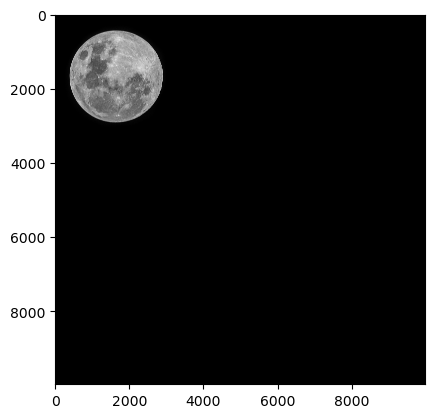

In [35]:
img_small = np.zeros_like(img)

h,w  = 3,3
sampling = np.ones((h,w))
sampling = sampling / np.sum(sampling)
channels = img.shape[-1]
for c in range(channels):
    for idx_i, i in enumerate(range(1, img.shape[0]-h,h)):
        for idx_j, j in enumerate(range(1, img.shape[1]-w, w)):
            # print(f'{i = } {j = } {idx_i = }, {idx_j = }')
            # plt.imshow(img[i-1:i+1,j-1:j+1])
            # print(f'{h//2 = } {i-h//2 = } {i+h//2 = }, {idx_i = }')
            # print(f'{img[i-h//2:i+h//2 + 1,j-w//2:j+w//2 +1,c] * sampling = }')
            # print(f'{np.sum(img[i-h//2:i+h//2 + 1,j-w//2:j+w//2 +1,c] * sampling) = }')
            img_small[idx_i,idx_j,c] = np.sum(img[i-h//2:i+h//2 + 1,j-w//2:j+w//2 +1,c] * sampling)
            # break
        # break
plt.imshow(img_small)

# Time 2 min 25 secs


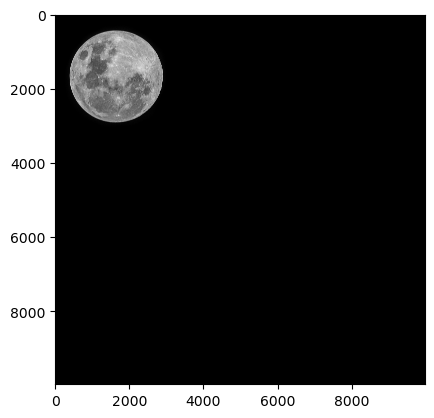

In [44]:
img_small2 = np.zeros_like(img)

h,w  = 3,3
sampling = np.ones((h,w))
sampling = sampling / np.sum(sampling)
sampling = np.array([sampling,sampling,sampling])
channels = img.shape[-1]


for idx_i, i in enumerate(range(1, img.shape[0]-h,h)):
    for idx_j, j in enumerate(range(1, img.shape[1]-w, w)):
        # matt = img[i-h//2:i+h//2 + 1,j-w//2:j+w//2 +1] * sampling
        # print(matt)
        # print(np.sum(matt,axis = (0,1)))
        img_small2[idx_i,idx_j] = np.sum(img[i-h//2:i+h//2 + 1,j-w//2:j+w//2 +1] * sampling, axis=(0,1))
    #     break
    # break
plt.imshow(img_small2)

# Time 1 min 32 secs

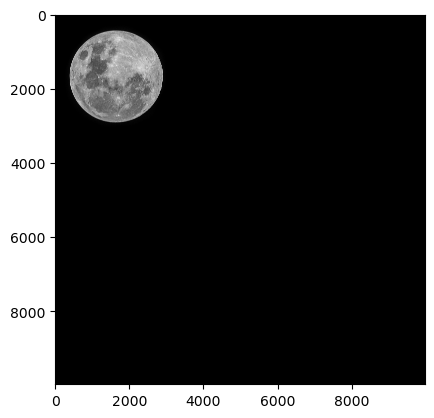

In [47]:
img_small3 = np.zeros_like(img)

h,w  = 3,3
sampling = np.ones((h,w))
sampling = sampling / np.sum(sampling)
# sampling = np.array([sampling,sampling,sampling])
channels = img.shape[-1]

for c in range(channels):
    for idx_i, i in enumerate(range(1, img.shape[0]-h,h)):
        for idx_j, j in enumerate(range(1, img.shape[1]-w, w)):
            img_small3[idx_i,idx_j,c] = np.dot(img[i-h//2:i+h//2 + 1,j-w//2:j+w//2 +1,c].flatten() , sampling.flatten())
        #     break
        # break
plt.imshow(img_small3)

# Time 2 min 01 secs

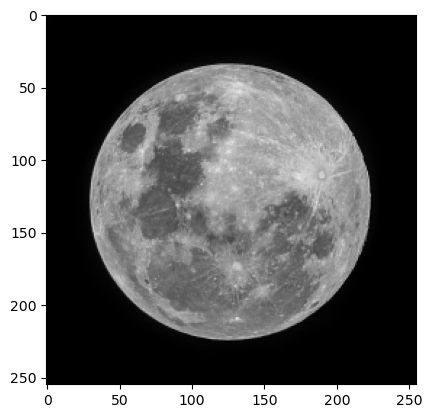

In [69]:
img_small_ = np.zeros_like(img)

h,w  = 39,39
sampling = np.ones((h,w))
sampling = sampling / np.sum(sampling)
sampling = np.array([sampling,sampling,sampling]).reshape((h,w,-1))
# print(f'{sampling.shape = }')
channels = img.shape[-1]


for idx_i, i in enumerate(range(h//2, img.shape[0]-h,h)):
    for idx_j, j in enumerate(range(w//2, img.shape[1]-w, w)):
        # print(f'{h//2 = } {i-h//2 = } {i+h//2 = }, {idx_i = }')
        # print(f'{img[i-h//2:i+h//2 + 1,j-w//2:j+w//2 +1].shape = }')
        # print(f'{np.sum(img[i-h//2:i+h//2 + 1,j-w//2:j+w//2 +1] * sampling) = }')
        # matt = img[i-h//2:i+h//2 + 1,j-w//2:j+w//2 +1] * sampling
        # print(matt)
        # print(np.sum(matt,axis = (0,1)))
        img_small_[idx_i,idx_j] = np.sum(img[i-h//2:i+h//2 + 1,j-w//2:j+w//2 + 1] * sampling, axis=(0,1))

img_small_ = img_small_[:img.shape[0]//h,:img.shape[1]//w,:]
plt.imshow(img_small_)

(4392, 7372, 3)

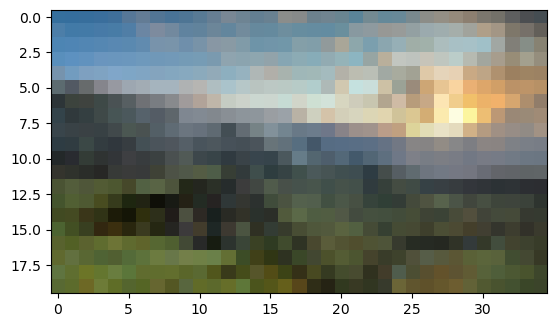

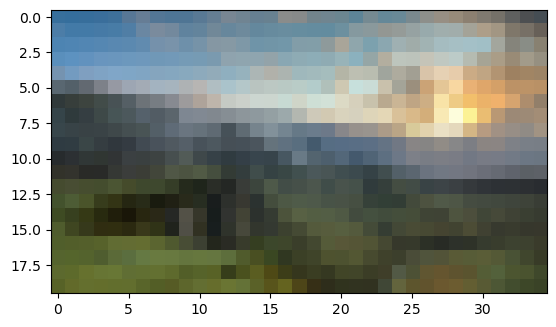

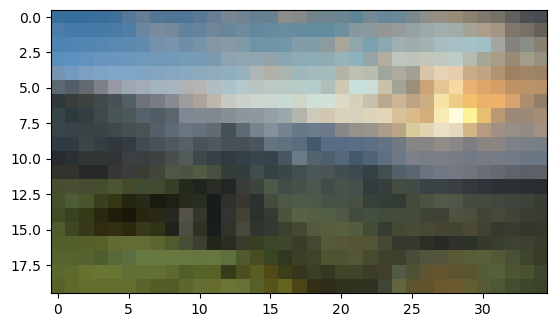

In [376]:
def resize(img, h = 39, w = 39,kernel = 'avg'):
    img_small_ = np.zeros_like(img)
    if h%2 == 0 :
        h += 1
    if w%2 == 0 :
        w += 1
    h_i,w_i = h//2, w//2
    if kernel == 'distance':
        i_vals = np.arange(h) - h_i
        j_vals = np.arange(w) - w_i
        I, J = np.meshgrid(i_vals, j_vals, indexing='ij')
        sampling = np.sqrt(I**2 + J**2)
    elif kernel == 'guassian':
        i_vals = np.arange(h) - h_i
        j_vals = np.arange(w) - w_i
        I, J = np.meshgrid(i_vals, j_vals, indexing='ij')
        distance_grid = - np.sqrt(I**2 + J**2)
        sampling = np.exp(distance_grid)
    elif kernel == 'avg':
        sampling = np.ones((h,w))
    else:
        print('ERR')
        return None
    sampling = sampling / np.sum(sampling)
    sampling = np.array([sampling,sampling,sampling]).reshape((h,w,3))
    if sampling.shape != (h,w,3) :
        print(f'ERR {sampling.shape = } {(h,w,3) = }')
    # print(f'{sampling.shape = }')
    for idx_i, i in enumerate(range(h_i, img.shape[0]-h-1,h)):
        for idx_j, j in enumerate(range(w_i, img.shape[1]-w-1, w)):
            img_small_[idx_i,idx_j] = np.sum(img[i-h_i:i+h_i+1,j-w_i:j+w_i+1] * sampling, axis=(0,1))

    img_small_ = img_small_[:img.shape[0]//h-1,:img.shape[1]//w-1,:]
    # plt.imshow(img_small_)
    return img_small_

# moon = images_dir + 'moon_bw.jpg'
nature = images_dir + 'nature.jpg'
# mountainSlit = images_dir + 'mountainSlit.jpg'
img = plt.imread(nature)
img.shape

# final_res = 25,25
# final_res = 40,70
final_res = 20,35

vh = img.shape[0] // (final_res[0] + 1)
vh = vh if vh%2 == 1 else vh-1
vw = img.shape[1] // (final_res[1] + 1)
vw = vw if vw%2 == 1 else vw-1
plt.imshow(resize(img,vh,vw, kernel= 'guassian'))
plt.show()
plt.close()
plt.imshow(resize(img,vh,vw, kernel= 'distance'))
plt.show()
plt.close()
plt.imshow(resize(img,vh,vw, kernel= 'avg'))
plt.show()
plt.close()

In [377]:
img_small = resize(img,vh,vw, kernel= 'avg')
img_small.shape

(20, 35, 3)

## Conv in 2D

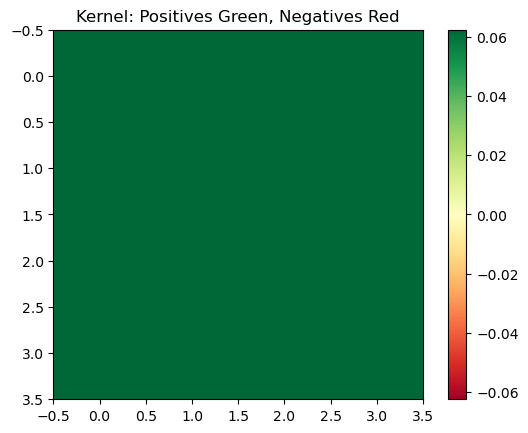

In [378]:
def avg_kernel(s = 3):
    k = np.ones((s,s))
    return k/(s*s)

def show_kernel(kernel):
    min_, max_ = kernel.min(), kernel.max()
    # Use a diverging colormap with red (negative) and green (positive)
    plt.imshow(kernel, cmap='RdYlGn', vmin=-max(abs(min_), abs(max_)), vmax=max(abs(min_), abs(max_)))
    plt.colorbar()
    plt.title('Kernel: Positives Green, Negatives Red')
    plt.show()
show_kernel(avg_kernel(4))

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

(20, 35)

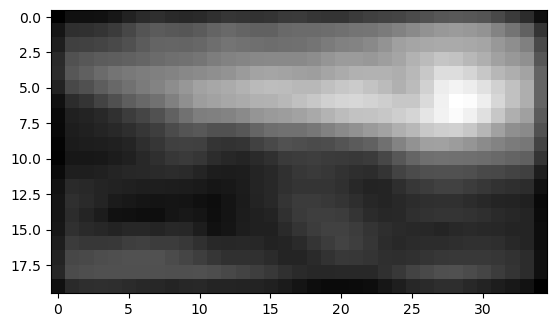

In [379]:

def conv2d_v1(image,kernel):
    
    result_img = np.zeros_like(image)

    kernel = np.fliplr(kernel)
    kernel = np.flipud(kernel)
    kernel_f = kernel.flatten()
    
    h2,w2 = kernel.shape[0],kernel.shape[1]
    h2_p, w2_p = h2//2, w2//2
    
    # print(f'{image.shape = }')
    padded_img = np.pad(image,((h2_p, h2_p),(w2_p,w2_p)))
    # print(f'{padded_img.shape = }')
    
    for i in range(h2_p, padded_img.shape[0] - h2_p):
        for j in range(w2_p, padded_img.shape[1] - w2_p):
            patch = padded_img[i - h2_p: i + h2_p + 1 , j - w2_p: j + w2_p + 1 ]
            # print(f'{patch.shape = }')
            result_img[i - h2_p, j - w2_p] = np.dot(patch.flatten(), kernel_f)
            
    return result_img

kernel = avg_kernel(3)
kernel

res = conv2d_v1(img_small[:,:,0],kernel)
res.shape
plt.imshow(res , cmap = 'gray')

## Conv in 3D

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

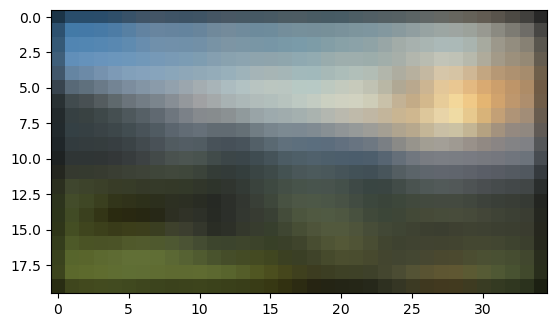

In [397]:
def conv3d_from_conv2d(image,kernel, conv2d = conv2d_v1):
    channels = image.shape[-1]
    result = np.zeros_like(image)
    for c in range(channels):
        # print(f'{image[:,:,c].shape = }')
        conv_patch = conv2d(image[:,:,c],kernel)
        # print(f'{conv_patch.shape = }')
        result[:,:,c] = conv_patch
        
    return result
    
kernel = avg_kernel(3)
kernel

res = conv3d_from_conv2d(img_small,kernel, conv2d_v1)
plt.imshow(res)

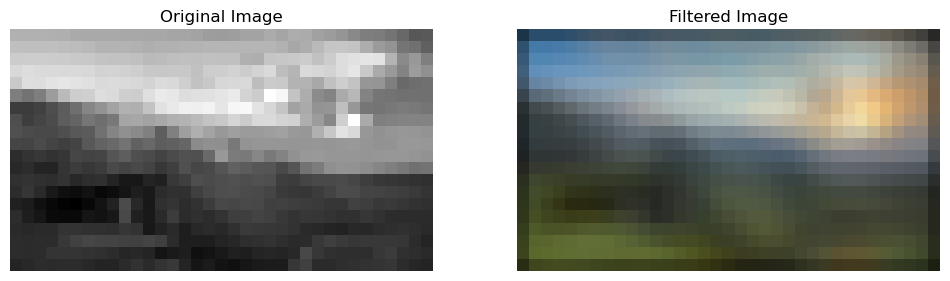

In [398]:
def plot_original_vs_filtered(img, img_filtered, type = None):
    plt.figure(figsize=(12,8))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_filtered, cmap='gray')
    if type is not None:
        plt.title(f'Filtered Image {type}')
    else :
        plt.title('Filtered Image')
    plt.axis('off')

    plt.show()    
# img_small.shape
# res.shape
plot_original_vs_filtered(img_small[:,:,c],res)

(3, 3, 3)

(20, 35, 3)

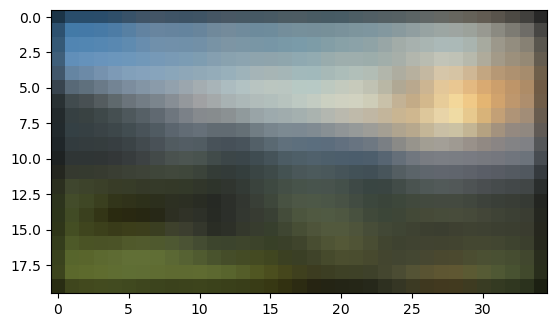

In [399]:

def conv3d_v1(image,kernel):
    result_img = np.zeros_like(image)
    if len(kernel.shape)  < 3:
        kernel = np.repeat(kernel[:,:,np.newaxis] , 3, axis=2)

    kernel = np.fliplr(kernel)
    kernel = np.flipud(kernel)
    # kernel_f = kernel.flatten()
    
    h2,w2 = kernel.shape[0],kernel.shape[1]
    h2_p, w2_p = h2//2, w2//2
    
    # print(f'{image.shape = }')
    # print(f'{kernel.shape = }')
    padded_img = np.pad(image,((h2_p, h2_p),(w2_p,w2_p), (0,0) ))
    # print(f'{padded_img.shape = }')
    
    for i in range(h2_p, padded_img.shape[0] - h2_p):
        for j in range(w2_p, padded_img.shape[1] - w2_p):
            patch = padded_img[i - h2_p: i + h2_p + 1 , j - w2_p: j + w2_p + 1 ]
            # print(f'{patch.shape = }')
            prod = patch * kernel
            # print(f'{prod.shape = }')
            prod_sum = np.sum(prod, axis=(0,1))
            # print(f'{prod_sum.shape = }')
            result_img[i - h2_p, j - w2_p] = prod_sum
            
    return result_img

kernel = avg_kernel(3)
def ker3d(kernel):
    if len(kernel.shape) < 3:
        kernel_3d = np.repeat(kernel[:,:,np.newaxis] , 3, axis=2)
        return kernel_3d
kernel_3d = ker3d(kernel)
kernel_3d.shape

res = conv3d_v1(img_small,kernel_3d)
res.shape
plt.imshow(res)

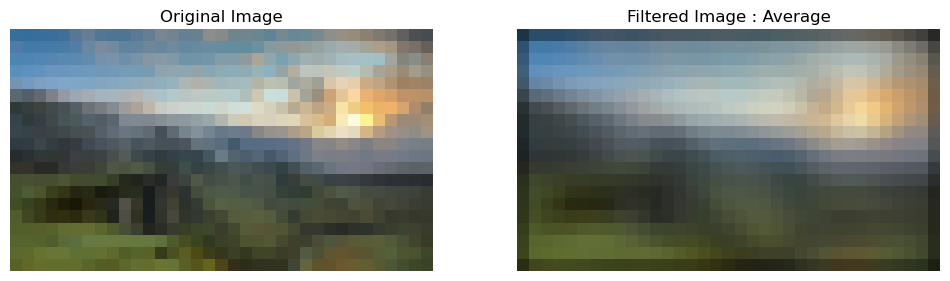

In [400]:
plot_original_vs_filtered(img_small,res, ': Average')

(3, 3, 3)

(20, 35, 3)

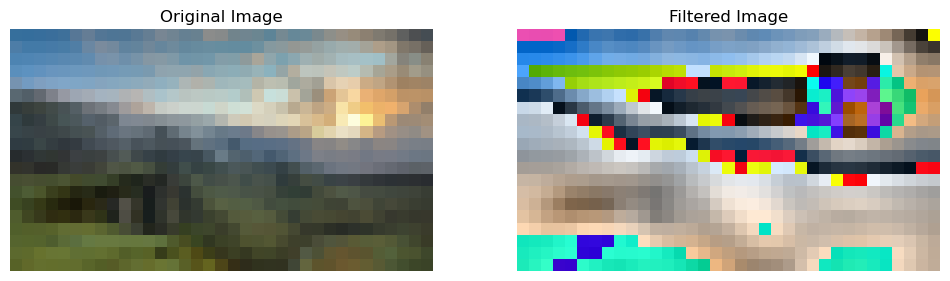

In [401]:
from scipy.ndimage import convolve
k3d = ker3d(avg_kernel(3))
k3d.shape

# res = convolve(img_small, kernel_3d, mode='reflect')
res = convolve(img_small, kernel_3d, mode='reflect')
res.shape
plot_original_vs_filtered(img_small,res)

## [filter] Gaussian Blur

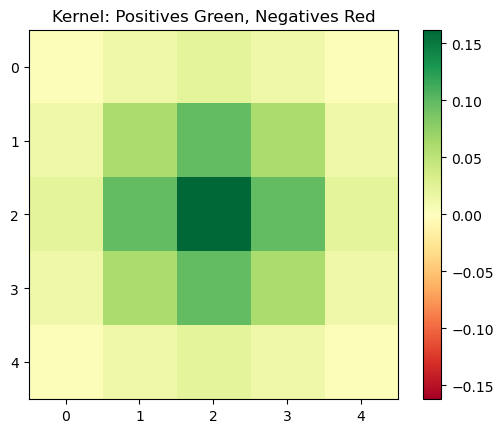

In [402]:
def gaussian_kernel(size, sigma = 1):
    center = size // 2
    x = np.arange(size) - center
    y = np.arange(size) - center
    X, Y = np.meshgrid(x, y)
    
    gauss = (1 / (2 * np.pi * sigma**2)) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    return gauss / gauss.sum()
show_kernel(gaussian_kernel(5,1))

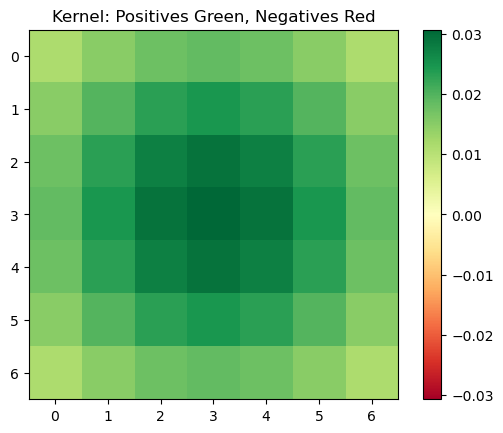

In [403]:
show_kernel(gaussian_kernel(7,3))

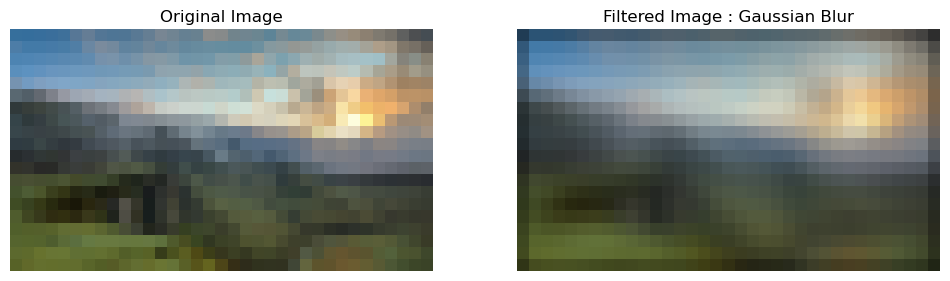

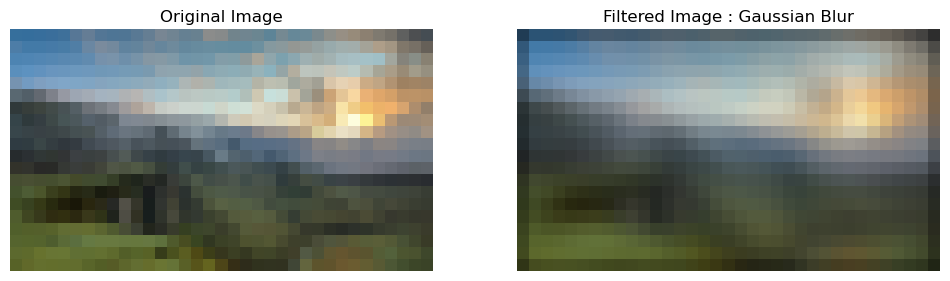

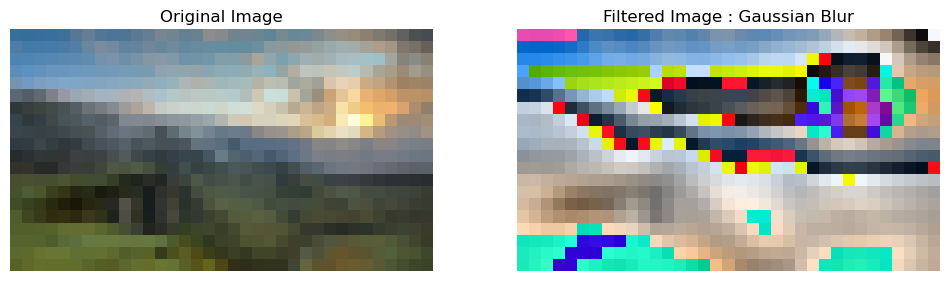

In [413]:
kernel_2d = gaussian_kernel(3)
kernel_3d = ker3d(kernel_2d)

res_gauss = conv3d_from_conv2d(img_small,kernel_2d, conv2d_v1)
plot_original_vs_filtered(img_small,res_gauss,': Gaussian Blur')
res_gauss = conv3d_v1(img_small,kernel_3d)
plot_original_vs_filtered(img_small,res_gauss,': Gaussian Blur')
res_gauss = convolve(img_small,kernel_3d)
plot_original_vs_filtered(img_small,res_gauss,': Gaussian Blur')

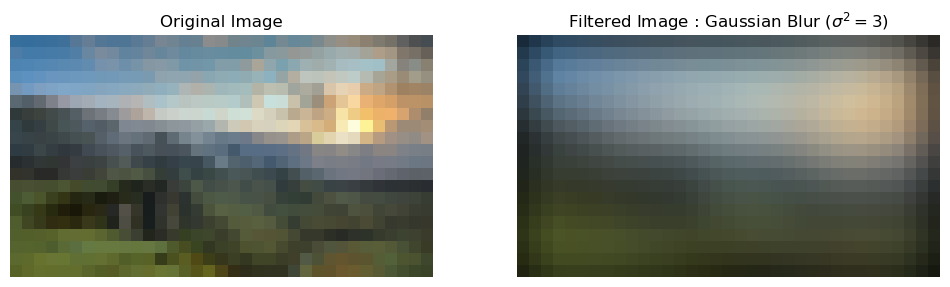

In [344]:
# res_gauss = conv3d_from_conv2d(img_small,gaussian_kernel(7,3), conv2d_v1)
# plot_original_vs_filtered(img_small,res_gauss)
res_gauss = conv3d_v1(img_small,gaussian_kernel(7,3))
plot_original_vs_filtered(img_small,res_gauss,f': Gaussian Blur ($\sigma^2=3$)')

## [filter] Sharpen

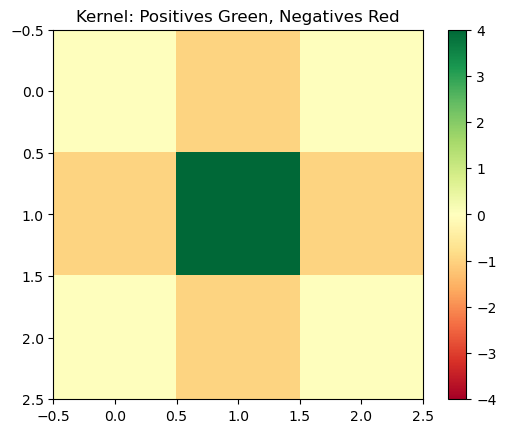

In [345]:
# def sharpen_kernel(size):
#     center = size // 2
#     x = np.abs(np.arange(size) - center)
#     y = np.abs(np.arange(size) - center)
#     X, Y = np.meshgrid(x, y)
#     k =  -(size - ( X+Y))
#     k[size//2,size//2] = -1 * (np.sum(k) - k[size//2,size//2])
#     print(k)
    
#     return k
def sharpen_kernel(size):
    k = np.array([ 
                  [0,-1,0],
                  [-1,4,-1],
                  [0,-1,0]
                  ], dtype=float)
    # print(k)
    
    return k
    
show_kernel(sharpen_kernel(3))

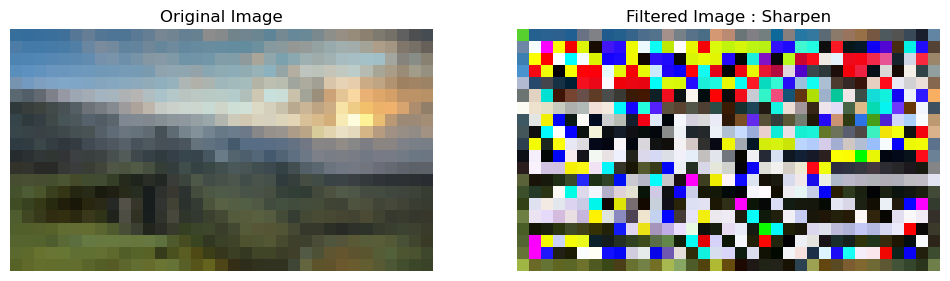

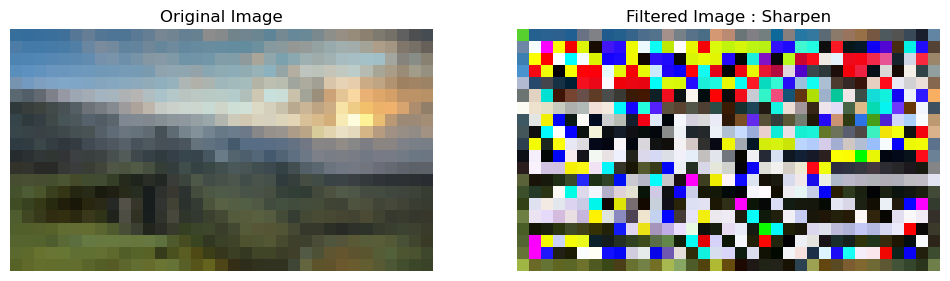

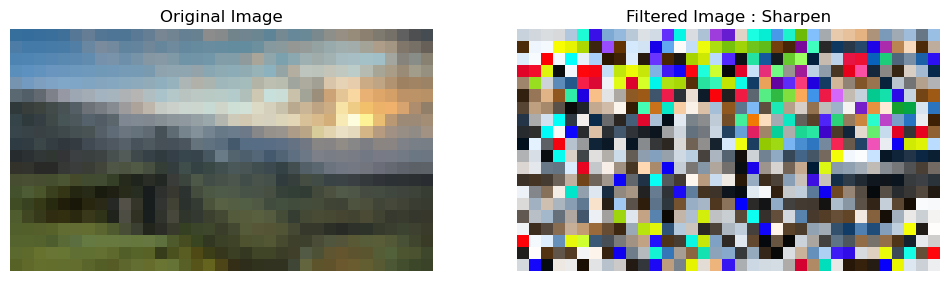

In [414]:
kernel_2d = sharpen_kernel(3)
kernel_3d = ker3d(kernel_2d)

res_gauss = conv3d_from_conv2d(img_small,kernel_2d, conv2d_v1)
plot_original_vs_filtered(img_small,res_gauss,': Sharpen')
res_gauss = conv3d_v1(img_small,kernel_3d)
plot_original_vs_filtered(img_small,res_gauss,': Sharpen')
res_gauss = convolve(img_small,kernel_3d)
plot_original_vs_filtered(img_small,res_gauss,': Sharpen')

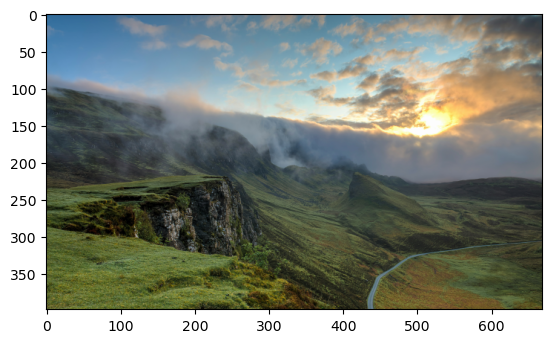

In [368]:
nature_img = plt.imread(nature)
nature_img_small = resize(nature_img,11,11, kernel= 'avg')
plt.imshow(nature_img_small)

(398, 669, 3)

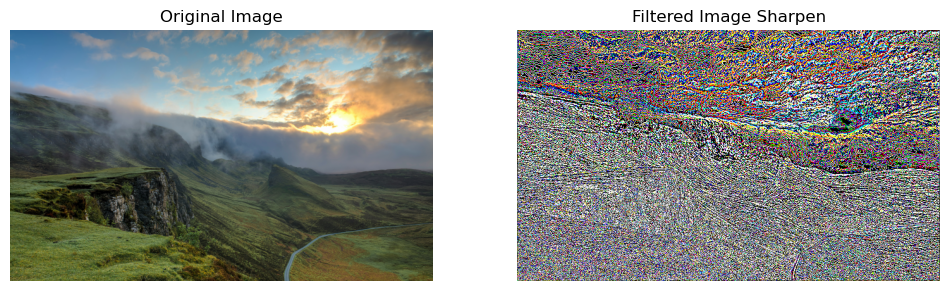

In [369]:
nature_img_small.shape
res_sharpen = conv3d_v1(nature_img_small,sharpen_kernel(3))
plot_original_vs_filtered(nature_img_small,res_sharpen, 'Sharpen')

## [filter] Edge

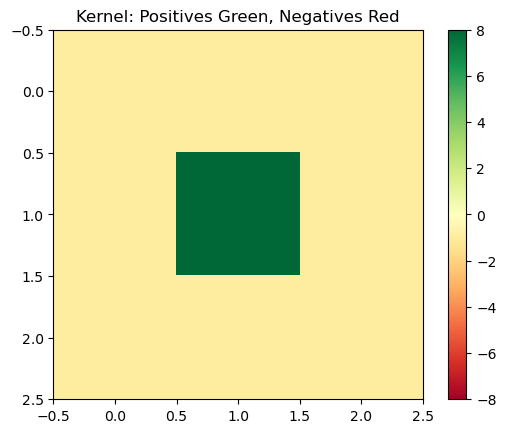

In [370]:
def sharpen_edge_kernel(size):
    k = np.array([ 
                  [-1,-1,-1],
                  [-1,8,-1],
                  [-1,-1,-1]
                  ], dtype=float)
    return k
    
show_kernel(sharpen_edge_kernel(3))

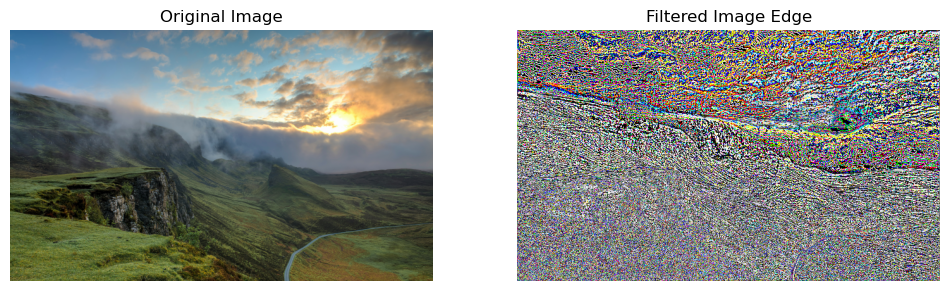

In [371]:
res_sharpen = conv3d_v1(nature_img_small,sharpen_edge_kernel(3))
plot_original_vs_filtered(nature_img_small,res_sharpen, 'Edge')

## [filter] sobel lr

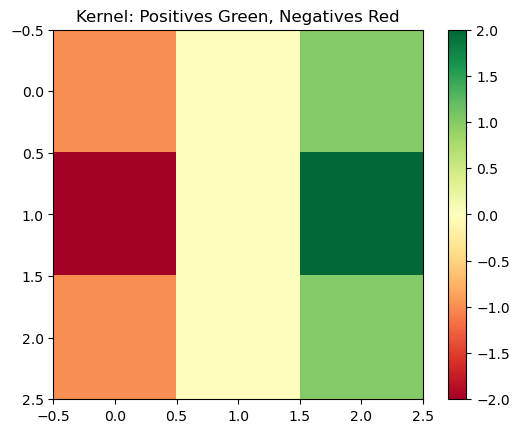

In [372]:
def sobel_lr_kernel(size):
    k = np.array([ 
                  [-1,0,1],
                  [-2,0,2],
                  [-1,0,1]
                  ], dtype=float)
    return k
    
show_kernel(sobel_lr_kernel(3))

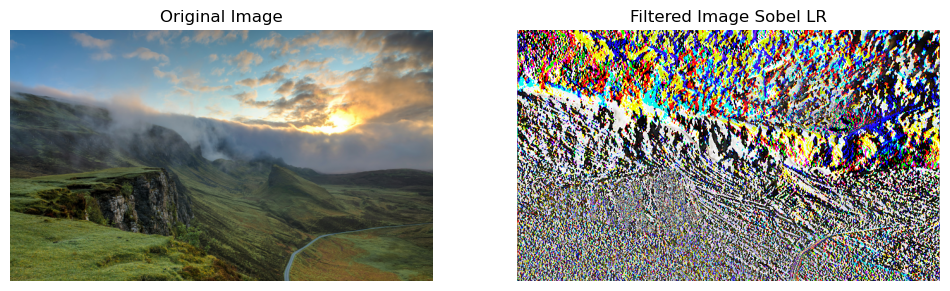

In [373]:
res_sharpen = conv3d_v1(nature_img_small,sobel_lr_kernel(3))
plot_original_vs_filtered(nature_img_small,res_sharpen, 'Sobel LR')

## [filter] Sobel up

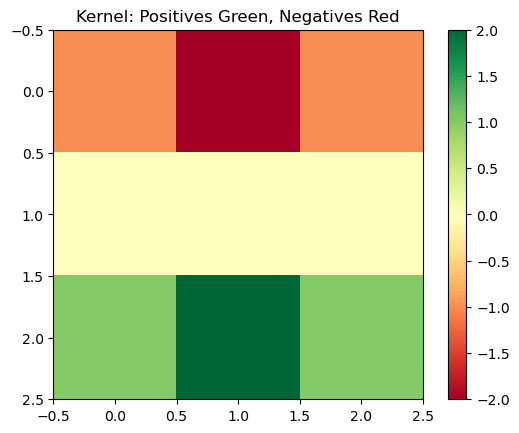

In [374]:
def sobel_ud_kernel(size):
    k = np.array([ 
                  [-1,-2,-1],
                  [0,0,0],
                  [1,2,1]
                  ], dtype=float)
    return k
    
show_kernel(sobel_ud_kernel(3))

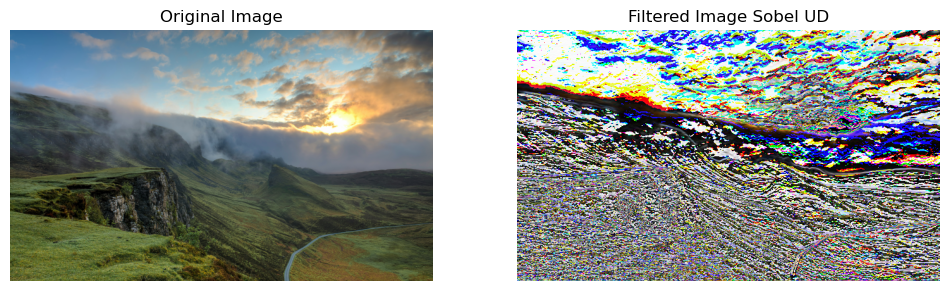

In [375]:
res_sharpen = conv3d_v1(nature_img_small,sobel_ud_kernel(3))
plot_original_vs_filtered(nature_img_small,res_sharpen, 'Sobel UD')